# Bhaskar Barman
# 21ms147

# Boundary value problem
# Solving Schroedinger's eq.n

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# The following is standard RK4. It calls a function f(x,y,k) where k is a paramter
def rk4(f,x,y,k,h):
    k1 = h*f(x,y,k)
    k2 = h*f(x + h/2, y + k1/2, k)
    k3 = h*f(x + h/2, y + k2/2, k)
    k4 = h*f(x + h, y + k3, k)
    return y + (k1+2*k2+2*k3+k4)/6

#caller 
def caller_rk4(f,xlim,yini,k,N):
    x1, x2 = xlim
    xs = np.linspace(x1, x2, N)
    h = xs[1] - xs[0]
    y = yini
    ys = np.zeros((N,len(yini)))
    for i in range(N):
        ys[i] = np.array(y)
        y = rk4(f, xs[i], y, k, h)
    return xs, ys

#secant 
def secant(ks,f,method,ybound):
    k1, k2 = ks
    iter = 0
    while abs(method(k2,f,ybound))>tol and iter<maxiter:
        f1 = method(k1,f,ybound)
        f2 = method(k2,f,ybound)
        k1, k2 = k2, (f2*k1 - f1*k2)/(f2 - f1)
        iter += 1
        print(iter, k1, k2, method(k2,f,ybound))
    if iter == maxiter:
        return iter, None
    else:
        return iter, k2

# Q1.a)

In [6]:
# The rhs of Schoedinger equation (using vectorized form)
def odefun1(x,y,E):
    k2 = E - pot_a(x);
    return np.array([y[1], -k2 * y[0]])

# The potential
def pot_a(x):
    if abs(x)>Lo:
        return 0.0
    else:
        return -Vo*(1-x)/2

In [7]:
Vo=40
Lo=1
xlim=(-2,2)
ybound=(0,0)
yini=(ybound[0],0.1)
N=100
maxiter= 50
tol = 1.0e-5

In [8]:
def score2(E,f,ybound):
    yini1 = (ybound[0], 1.0e-2);
    xs1, ys1 = caller_rk4(odefun1,xlim,yini1,E,N)
    a = abs(xs1 + Lo);
    n1=np.where(a == np.min(a))[0][0]
    yini2 = (ybound[1], 1.0e-2)
    xs2, ys2 = caller_rk4(odefun1,xlim[-1::-1],yini2,E,N)
    a = abs(xs2 + Lo);
    n2=np.where(a == np.min(a))[0][0]
    ys2 = ys1[n1][0]*ys2/ys2[n2][0]
    return ys1[n1][1] - ys2[n2][1]

In [9]:
Es = np.linspace(-Vo, 0, 1000);
scores = [score2(E, odefun1, ybound) for E in Es];

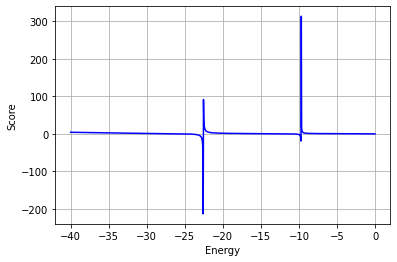

In [10]:
plt.plot(Es,scores,'b-');
plt.grid()
# plt.xlim(-28,-23)
# plt.ylim(-1,1)
plt.xlabel("Energy");
plt.ylabel("Score");

In [11]:
Eini=-27,-21
iter,Eeigen = secant(Eini,odefun1,score2,ybound);

1 -21 -28.0408674503257 0.5292626781858101
2 -28.0408674503257 -30.861819755886323 1.1549398503609596
3 -30.861819755886323 -25.654613262587006 -0.14833957883365723
4 -25.654613262587006 -26.247298761040124 0.057749956790252965
5 -26.247298761040124 -26.081217733091485 0.0041673380128786075
6 -26.081217733091485 -26.06830093662314 -0.00011830985459670984
7 -26.06830093662314 -26.06865751848877 2.422333937879273e-07


# For Eigenvalue(energy) -26.0686

Text(0, 0.5, '$\\psi$')

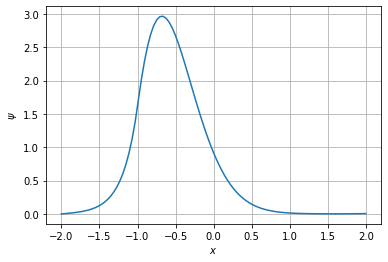

In [12]:
xs, ys = caller_rk4(odefun1, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")


(-30.0, -5.0)

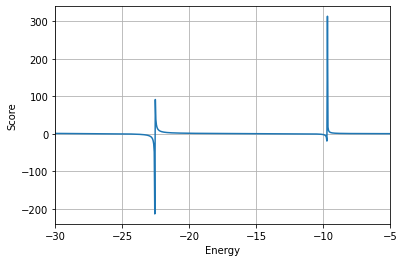

In [13]:
plt.plot(Es,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
#plt.ylim([-20.,20.])
plt.xlim([-30,-5])


# For Eigenvalue(energy) -13.479469

1 -10 -14.676811021496132 0.12904832788829657
2 -14.676811021496132 -14.435135866888846 0.103393616316277
3 -14.435135866888846 -13.461136680092467 -0.002073067690314817
4 -13.461136680092467 -13.480281742474578 9.189558794456265e-05
5 -13.480281742474578 -13.479469097391169 1.228197796243613e-07


Text(0, 0.5, '$\\psi$')

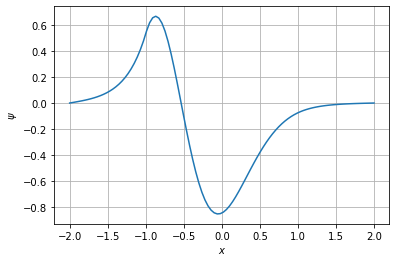

In [14]:
Eini=(-15,-10)
iter,Eeigen = secant(Eini,odefun1,score2,ybound);
xs, ys = caller_rk4(odefun1, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")

# For Eigenvalue(energy) -3.524142741652974

1 0 -3.8901878829848084 0.01491146593485887
2 -3.8901878829848084 -3.808035205536074 0.011514419464135749
3 -3.808035205536074 -3.5295755505390036 0.00022034977444131132
4 -3.5295755505390036 -3.524142741652974 2.658678375070528e-06


Text(0, 0.5, '$\\psi$')

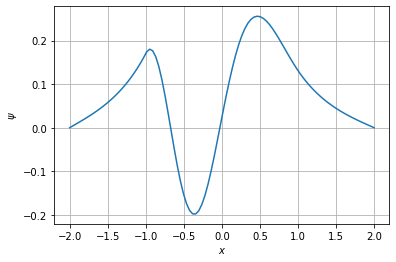

In [15]:
Eini=(-4,0)
iter,Eeigen = secant(Eini,odefun1,score2,ybound);
xs, ys = caller_rk4(odefun1, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")

# b) For potential well of $V=x^2$

In [16]:
# The rhs of Schoedinger equation (using vectorized form)
def odefun2(x,y,E):
    k2 = E - pot_b(x);
    return np.array([y[1], -k2 * y[0]])

# The potential
def pot_b(x):
        return x**2

In [17]:

Lo=1
xlim=(-3,3)
ybound=(0,0)
yini=(ybound[0],0.1)
N=100
maxiter= 50
tol = 1.0e-5

In [18]:
def score_b(E,f,ybound):
    yini1 = (ybound[0], 1.0e-2);
    xs1, ys1 = caller_rk4(odefun2,xlim,yini1,E,N)
    a = abs(xs1 + Lo);
    n1=np.where(a == np.min(a))[0][0]
    yini2 = (ybound[1], 1.0e-2)
    xs2, ys2 = caller_rk4(odefun2,xlim[-1::-1],yini2,E,N)
    a = abs(xs2 + Lo);
    n2=np.where(a == np.min(a))[0][0]
    ys2 = ys1[n1][0]*ys2/ys2[n2][0]
    return ys1[n1][1] - ys2[n2][1]

In [19]:
Es_b = np.linspace(0,20,1000);
scores_b = [score_b(E, odefun2, ybound) for E in Es_b];

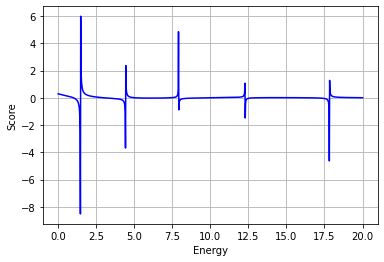

In [20]:
plt.plot(Es_b,scores_b,'b-');
plt.grid()

plt.xlabel("Energy");
plt.ylabel("Score");

(-0.05, 0.05)

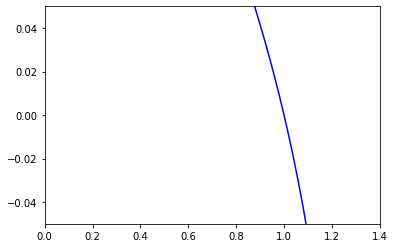

In [21]:
plt.plot(Es_b,scores_b,'b-');
plt.xlim(0,1.4)
plt.ylim(-0.05,0.05)

In [22]:
Eini=0.5,1.4
iter,Eeigen = secant(Eini,odefun2,score_b,ybound);

1 1.4 0.6353111822476702 0.12492718249679462
2 0.6353111822476702 0.72751804021393 0.0985616340863063
3 0.72751804021393 1.07221250488523 -0.037371915709257506
4 1.07221250488523 0.9774464041064517 0.010595724432965428
5 0.9774464041064517 0.9983795891966788 0.0011216315706579771
6 0.9983795891966788 1.0008578550964187 -3.538034495546849e-05
7 1.0008578550964187 1.0007820720372806 1.1687731911458332e-07


Text(0, 0.5, '$\\psi$')

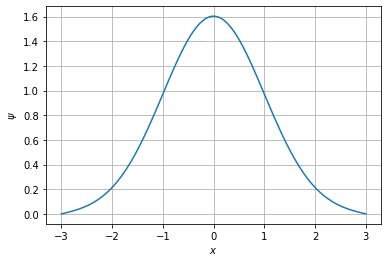

In [23]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")

(-0.05, 0.05)

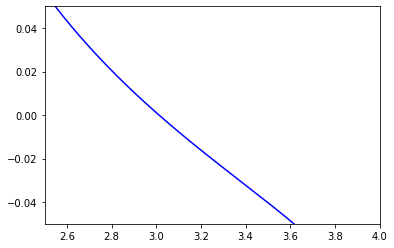

In [30]:
plt.plot(Es_b,scores_b,'b-');
plt.xlim(2.5,4)
plt.ylim(-0.05,0.05)

In [31]:
Eini=2.8,4
iter,Eeigen = secant(Eini,odefun2,score_b,ybound);

1 4 3.0124380297453888 -2.4524967934173945e-05
2 3.0124380297453888 3.0121834575526436 -1.6331599512745996e-06


Text(0, 0.5, '$\\psi$')

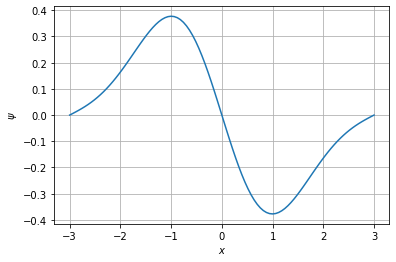

In [32]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")

(-0.05, 0.05)

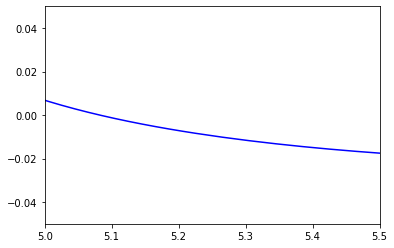

In [34]:
plt.plot(Es_b,scores_b,'b-');
plt.xlim(5,5.5)
plt.ylim(-0.05,0.05)

In [35]:
Eini=5,5.5
iter,Eeigen = secant(Eini,odefun2,score_b,ybound);

1 5.5 5.140100280335963 -0.0038210691680529013
2 5.140100280335963 5.039610677291913 0.0032999154311565138
3 5.039610677291913 5.086178281411247 -0.00028070078487599237
4 5.086178281411247 5.082527635199133 -1.8956380755476288e-05
5 5.082527635199133 5.082263243531113 1.1755729600534948e-07


Text(0, 0.5, '$\\psi$')

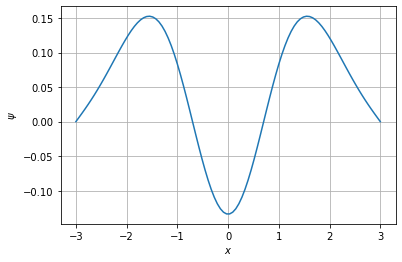

In [36]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")

(-0.05, 0.05)

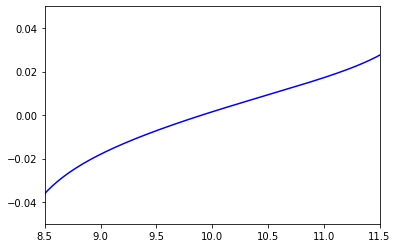

In [42]:
plt.plot(Es_b,scores_b,'b-');
plt.xlim(8.5,11.5)
plt.ylim(-0.05,0.05)

In [43]:
Eini=8.5,11.5
iter,Eeigen = secant(Eini,odefun2,score_b,ybound);

1 11.5 10.20272085556813 0.004724600281718307
2 10.20272085556813 9.933699851433076 0.00041667004422100095
3 9.933699851433076 9.907679700801657 -1.2868019663172538e-05
4 9.907679700801657 9.908459207527873 3.919522276369953e-08


Text(0, 0.5, '$\\psi$')

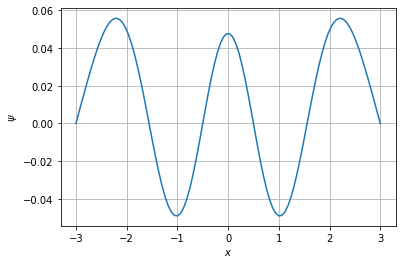

In [44]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")